In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   sklearn.decomposition import IncrementalPCA, KernelPCA, PCA
from   sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
data = pd.read_csv('merged.csv')
data.head()

,member_id,mins_28_days_ago,mins_27_days_ago,mins_26_days_ago,mins_25_days_ago,mins_24_days_ago,mins_23_days_ago,mins_22_days_ago,mins_21_days_ago,mins_20_days_ago,...,pct_salesforce,pct_vmware,playlist_actions,development,devops,networking,pm,pm / end user,systems,workforce
0,624,0.0,0.0,31.4832,3.6333,24.4166,0.000,53.7497,0.0,0.0000,...,0.0,0.0000,0.0,0.0000,0.0000,151.1166,0.0,0.0,97.3333,0.0
1,738,0.0,0.0,192.4153,14.6165,113.8330,122.166,0.0000,0.0,0.0000,...,0.0,0.0000,12.0,28.4583,166.5833,103.7708,0.0,0.0,109.1833,0.0
2,1090,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.0000,0.0,20.2332,...,0.0,0.9998,0.0,0.0000,0.0000,0.0000,0.0,0.0,174.3166,0.0
3,3468,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0000,...,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0
4,4300,13.7,0.0,52.8331,0.0000,54.9828,0.000,0.0000,0.0,3.3500,...,0.0,0.0000,0.0,0.0000,0.0000,4.3333,0.0,0.0,460.0833,0.0


In [4]:
#sorted(list(data))

In [5]:
scaled = pd.DataFrame(StandardScaler().fit_transform(data), 
                      columns=data.columns)
scaled.head()

,member_id,mins_28_days_ago,mins_27_days_ago,mins_26_days_ago,mins_25_days_ago,mins_24_days_ago,mins_23_days_ago,mins_22_days_ago,mins_21_days_ago,mins_20_days_ago,...,pct_salesforce,pct_vmware,playlist_actions,development,devops,networking,pm,pm / end user,systems,workforce
0,-4.889597,-0.22695,-0.293887,0.178459,-0.212774,0.106840,-0.217063,0.627842,-0.334874,-0.299446,...,-0.026223,-0.267680,-0.418070,-0.182834,-0.251277,0.002031,-0.095671,-0.131046,0.150597,-0.131046
1,-4.889340,-0.22695,-0.293887,2.519571,-0.064378,1.421594,1.665541,-0.223767,-0.334874,-0.299446,...,-0.026223,-0.267680,4.775209,0.325813,2.637065,-0.148964,-0.095671,-0.131046,0.215332,-0.131046
2,-4.888549,-0.22695,-0.293887,-0.279533,-0.261864,-0.252175,-0.217063,-0.223767,-0.334874,0.003922,...,-0.026223,6.055039,-0.418070,-0.182834,-0.251277,-0.479909,-0.095671,-0.131046,0.571146,-0.131046
3,-4.883203,-0.22695,-0.293887,-0.279533,-0.261864,-0.252175,-0.217063,-0.223767,-0.334874,-0.299446,...,-0.026223,-0.267680,-0.418070,-0.182834,-0.251277,-0.479909,-0.095671,-0.131046,-0.381122,-0.131046
4,-4.881332,0.28158,-0.293887,0.489041,-0.261864,0.556277,-0.217063,-0.223767,-0.334874,-0.249217,...,-0.026223,-0.267680,-0.418070,-0.182834,-0.251277,-0.466090,-0.095671,-0.131046,2.132253,-0.131046


In [6]:
pca = PCA()
projected = pca.fit_transform(scaled)
type(projected)

numpy.ndarray

In [7]:
print(projected.shape)
print(projected.shape == scaled.shape)

(12186, 80)
True


In [8]:
pca.explained_variance_ratio_

array([2.19806055e-01, 4.87093520e-02, 4.09871448e-02, 3.61330130e-02,
       2.88631142e-02, 2.63279499e-02, 2.48084437e-02, 2.13775414e-02,
       2.00526138e-02, 1.79931362e-02, 1.75725670e-02, 1.60411694e-02,
       1.51068655e-02, 1.47849491e-02, 1.45494008e-02, 1.42352683e-02,
       1.38900390e-02, 1.36314083e-02, 1.32992124e-02, 1.30523654e-02,
       1.27084489e-02, 1.26396177e-02, 1.25455183e-02, 1.24894257e-02,
       1.24305135e-02, 1.22595921e-02, 1.20886170e-02, 1.19727690e-02,
       1.16730004e-02, 1.15014738e-02, 1.11984860e-02, 1.10870630e-02,
       1.10698384e-02, 1.06602282e-02, 1.04820628e-02, 1.01639036e-02,
       9.50849507e-03, 9.27485395e-03, 8.69305038e-03, 8.27657072e-03,
       8.02942394e-03, 7.66727763e-03, 7.37359569e-03, 7.26535676e-03,
       6.88584865e-03, 6.66556810e-03, 6.43936626e-03, 6.22352327e-03,
       5.86997953e-03, 5.75096118e-03, 5.54977678e-03, 5.24205594e-03,
       5.14363973e-03, 4.95257189e-03, 4.90167601e-03, 4.73080058e-03,
      

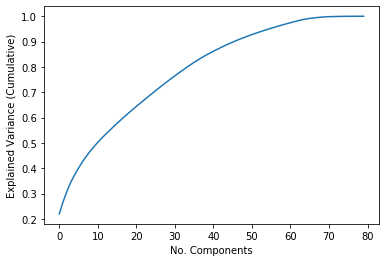

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. Components')
plt.ylabel('Explained Variance (Cumulative)');

In [10]:
VAR_THRESHOLD = 0.8
n_components = np.where(
    np.cumsum(pca.explained_variance_ratio_) >= VAR_THRESHOLD)
n_components

(array([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),)

In [11]:
n_comp = n_components[0][0] + 1 # +1 b/c 0th index == PC1
n_comp

35

In [12]:
pca = PCA(n_components=n_components[0][0] + 1)
projected = pca.fit_transform(scaled)
projected.shape

(12186, 35)

So now... let's visualize the data to see if we can make out clusters.

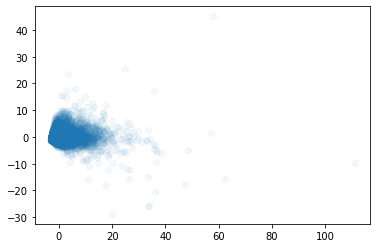

In [13]:
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.05)
plt.axis('equal');

In [ ]:
np.linspace(1, 17, 9)

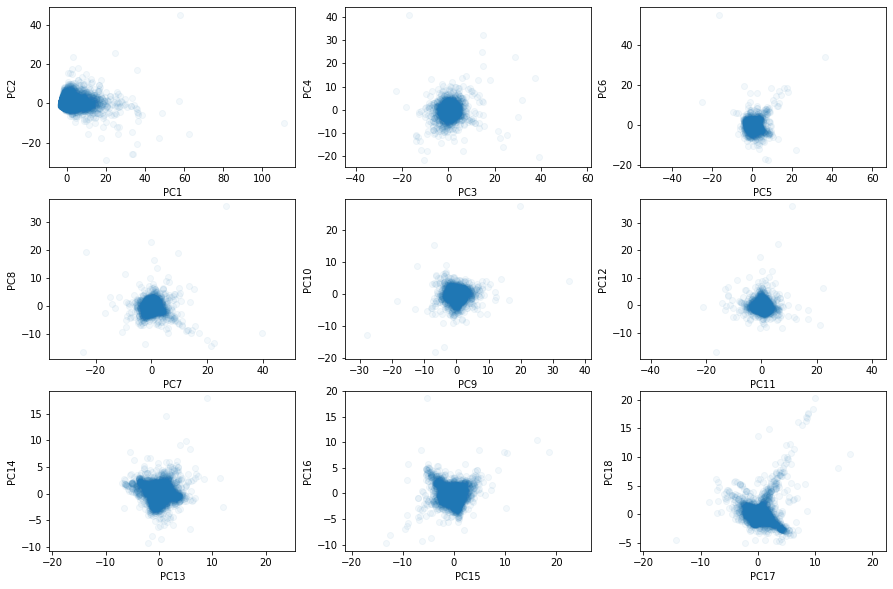

In [14]:
plt.figure(figsize=(15, 10))
for pc in np.linspace(1, 17, 9, dtype=int):
    i = pc // 2 + 1
    plt.subplot(3, 3, i)
    plt.scatter(projected[:, pc - 1], projected[:, pc], alpha=0.05)
    plt.xlabel(f'PC{pc}')
    plt.ylabel(f'PC{pc + 1}')
    plt.axis('equal')

Unlike R, scikit-learn does not make the loadings available.  If you need to compute them, you can use R, or compute by hand: https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html

# Some extras

### Incremental PCA
Optimized for larger datasets (though frankly normal PCA is quite fast until you get to millions of rows/cols).

For a finite number of iterations it may give a sub-optimal solution, but will converge quickly as number of batches increases.

In [15]:
N_BATCHES = 5
inc_pca = IncrementalPCA(n_components=n_comp)
#X = scaled.values()

for batch in np.array_split(scaled, N_BATCHES):
    inc_pca.partial_fit(batch)
    
reduced = inc_pca.transform(scaled)

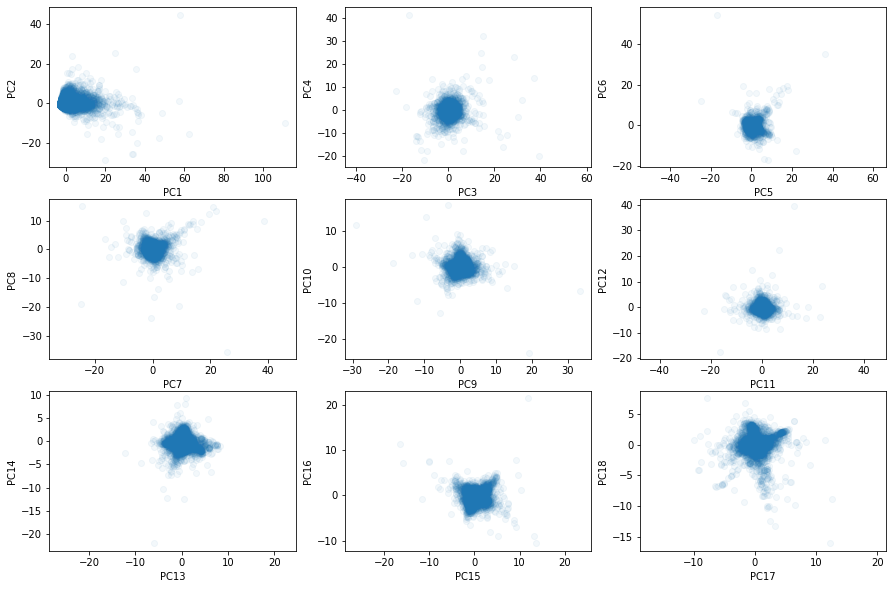

In [16]:
plt.figure(figsize=(15, 10))
for pc in np.linspace(1, 17, 9, dtype=int):
    i = pc // 2 + 1
    plt.subplot(3, 3, i)
    plt.scatter(reduced[:, pc - 1], reduced[:, pc], alpha=0.05)
    plt.xlabel(f'PC{pc}')
    plt.ylabel(f'PC{pc + 1}')
    plt.axis('equal')

# Kernel PCA

Can fit to complex manifolds, but computationally expensive! (Note that I am limiting the no. of components here to just 6.)

In [17]:
rbf_pca = KernelPCA(n_components=6, kernel='rbf', gamma=1/10)
reduced = rbf_pca.fit_transform(scaled)

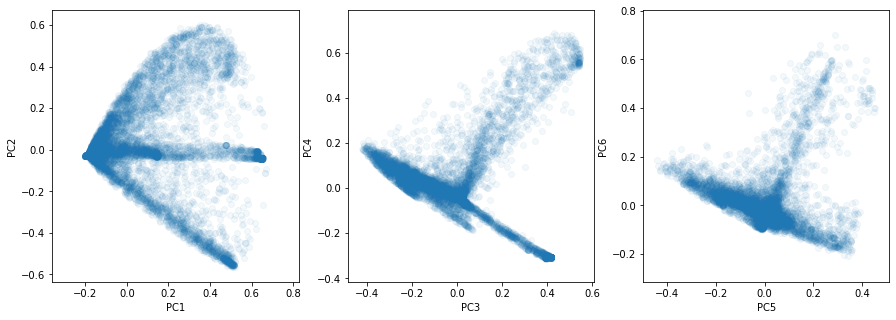

In [18]:
plt.figure(figsize=(15, 5))
for pc in np.linspace(1, 5, 3, dtype=int):
    i = pc // 2 + 1
    plt.subplot(1, 3, i)
    plt.scatter(reduced[:, pc - 1], reduced[:, pc], alpha=0.05)
    plt.xlabel(f'PC{pc}')
    plt.ylabel(f'PC{pc + 1}')
    plt.axis('equal')

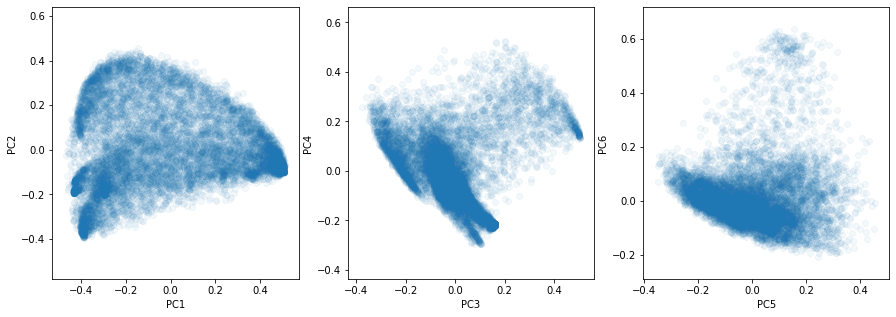

In [19]:
# gamma effects the kernel coeff (i.e., how quickly does weight of other 
# points drop off for each local fitting?)
rbf_pca = KernelPCA(n_components=6, kernel='rbf', gamma=1/50)
reduced = rbf_pca.fit_transform(scaled)

plt.figure(figsize=(15, 5))
for pc in np.linspace(1, 5, 3, dtype=int):
    i = pc // 2 + 1
    plt.subplot(1, 3, i)
    plt.scatter(reduced[:, pc - 1], reduced[:, pc], alpha=0.05)
    plt.xlabel(f'PC{pc}')
    plt.ylabel(f'PC{pc + 1}')
    plt.axis('equal')

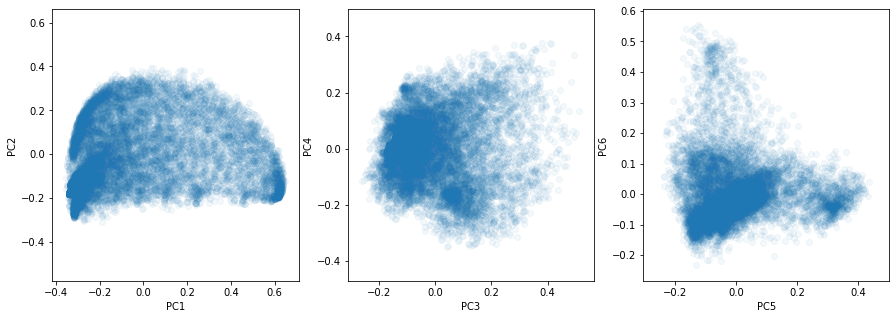

In [20]:
rbf_pca = KernelPCA(n_components=6, kernel='rbf', gamma=1/100)
reduced = rbf_pca.fit_transform(scaled)

plt.figure(figsize=(15, 5))
for pc in np.linspace(1, 5, 3, dtype=int):
    i = pc // 2 + 1
    plt.subplot(1, 3, i)
    plt.scatter(reduced[:, pc - 1], reduced[:, pc], alpha=0.05)
    plt.xlabel(f'PC{pc}')
    plt.ylabel(f'PC{pc + 1}')
    plt.axis('equal')

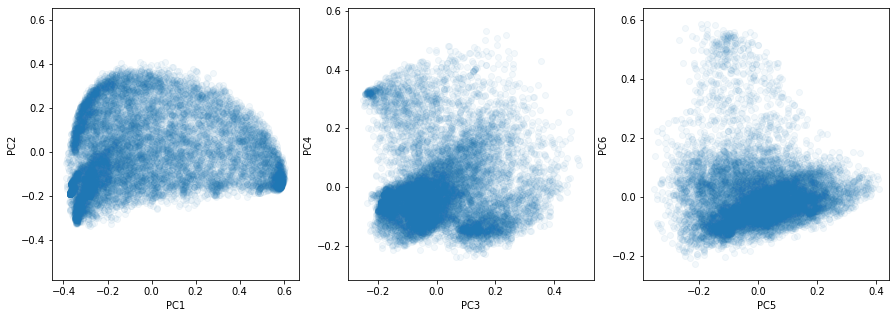

In [21]:
# The default value is 1 / n_features (1/80 for this case) and is usually 
# quite acceptable
rbf_pca = KernelPCA(n_components=6, kernel='rbf')
reduced = rbf_pca.fit_transform(scaled)

plt.figure(figsize=(15, 5))
for pc in np.linspace(1, 5, 3, dtype=int):
    i = pc // 2 + 1
    plt.subplot(1, 3, i)
    plt.scatter(reduced[:, pc - 1], reduced[:, pc], alpha=0.05)
    plt.xlabel(f'PC{pc}')
    plt.ylabel(f'PC{pc + 1}')
    plt.axis('equal')

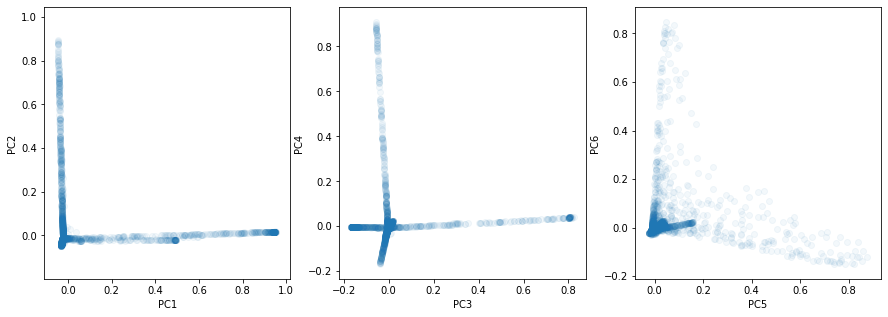

In [22]:
rbf_pca = KernelPCA(n_components=6, kernel='rbf', gamma=1)
reduced = rbf_pca.fit_transform(scaled)

plt.figure(figsize=(15, 5))
for pc in np.linspace(1, 5, 3, dtype=int):
    i = pc // 2 + 1
    plt.subplot(1, 3, i)
    plt.scatter(reduced[:, pc - 1], reduced[:, pc], alpha=0.05)
    plt.xlabel(f'PC{pc}')
    plt.ylabel(f'PC{pc + 1}')
    plt.axis('equal')

See a classic example here: 
https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py


While Kernel PCA is incredibly cool, its use case are limited.  If you think trying to explain regular PCs to the layperson in challenging....

Also, while some transformations of the data may be desirable, you will not typically want transformations that are arbitrarily complex, and in the case of clustering, "clusters" may appear on some components as an artifact of the transformation, and these clusters may have little bearing in reality.